In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import *


In [3]:
 #Función para calcular la tendencia inicial
def tendencia_inicial(series: List, m: int) -> float:
    return sum([
        float(series[i + m] - series[i]) / m
        for i in range(m)
    ]) / m


In [4]:
# Función para calcular la estacionalidad inicial
def estacionalidad_inicial(series: List, m: int) -> List:
    estacionalidad_inicial = []
    n_estaciones = int(len(series) / m)

    promedios_estacionales = [sum(
        series[m * i: m * i + m]
    ) / m for i in range(n_estaciones)]

    estacionalidad_inicial.extend([
        sum([series[m * j + i] - promedios_estacionales[j]
             for j in range(n_estaciones)]) / n_estaciones
        for i in range(m)
    ])

    return estacionalidad_inicial

In [5]:
# Función para aplicar el suavizado exponencial de Holt-Winters
def suavizado_winters(series: List,
               m: int,
               alpha: float = 0.2,
               beta: float = 0.2,
               gamma: float = 0.15,
               pasos_futuros: int = 1) -> List:
    
    l = [series[0]]  # Nivel
    t = [tendencia_inicial(series, m)]  # Tendencia
    s = estacionalidad_inicial(series, m)  # Estacionalidad

    predicciones = []
    for t_index in range(len(series) + pasos_futuros):

        if t_index >= len(series):
            m = t_index - len(series) + 1
            predicciones.append(
                (l[-1] + m * t[-1]) + s[t_index % m]
            )

        else:
            l_t = alpha * (series[t_index] - s[t_index % m]) + (1 - alpha) * (l[-1] + t[-1])

            t[-1] = beta * (l_t - l[-1]) + (1 - beta) * t[-1]
            l[-1] = l_t

            s[t_index % m] = gamma * (series[t_index] - l_t) + (1 - gamma) * s[t_index % m]

            predicciones.append(
                (l[-1] + t[-1]) + s[t_index % m]
            )

    return predicciones

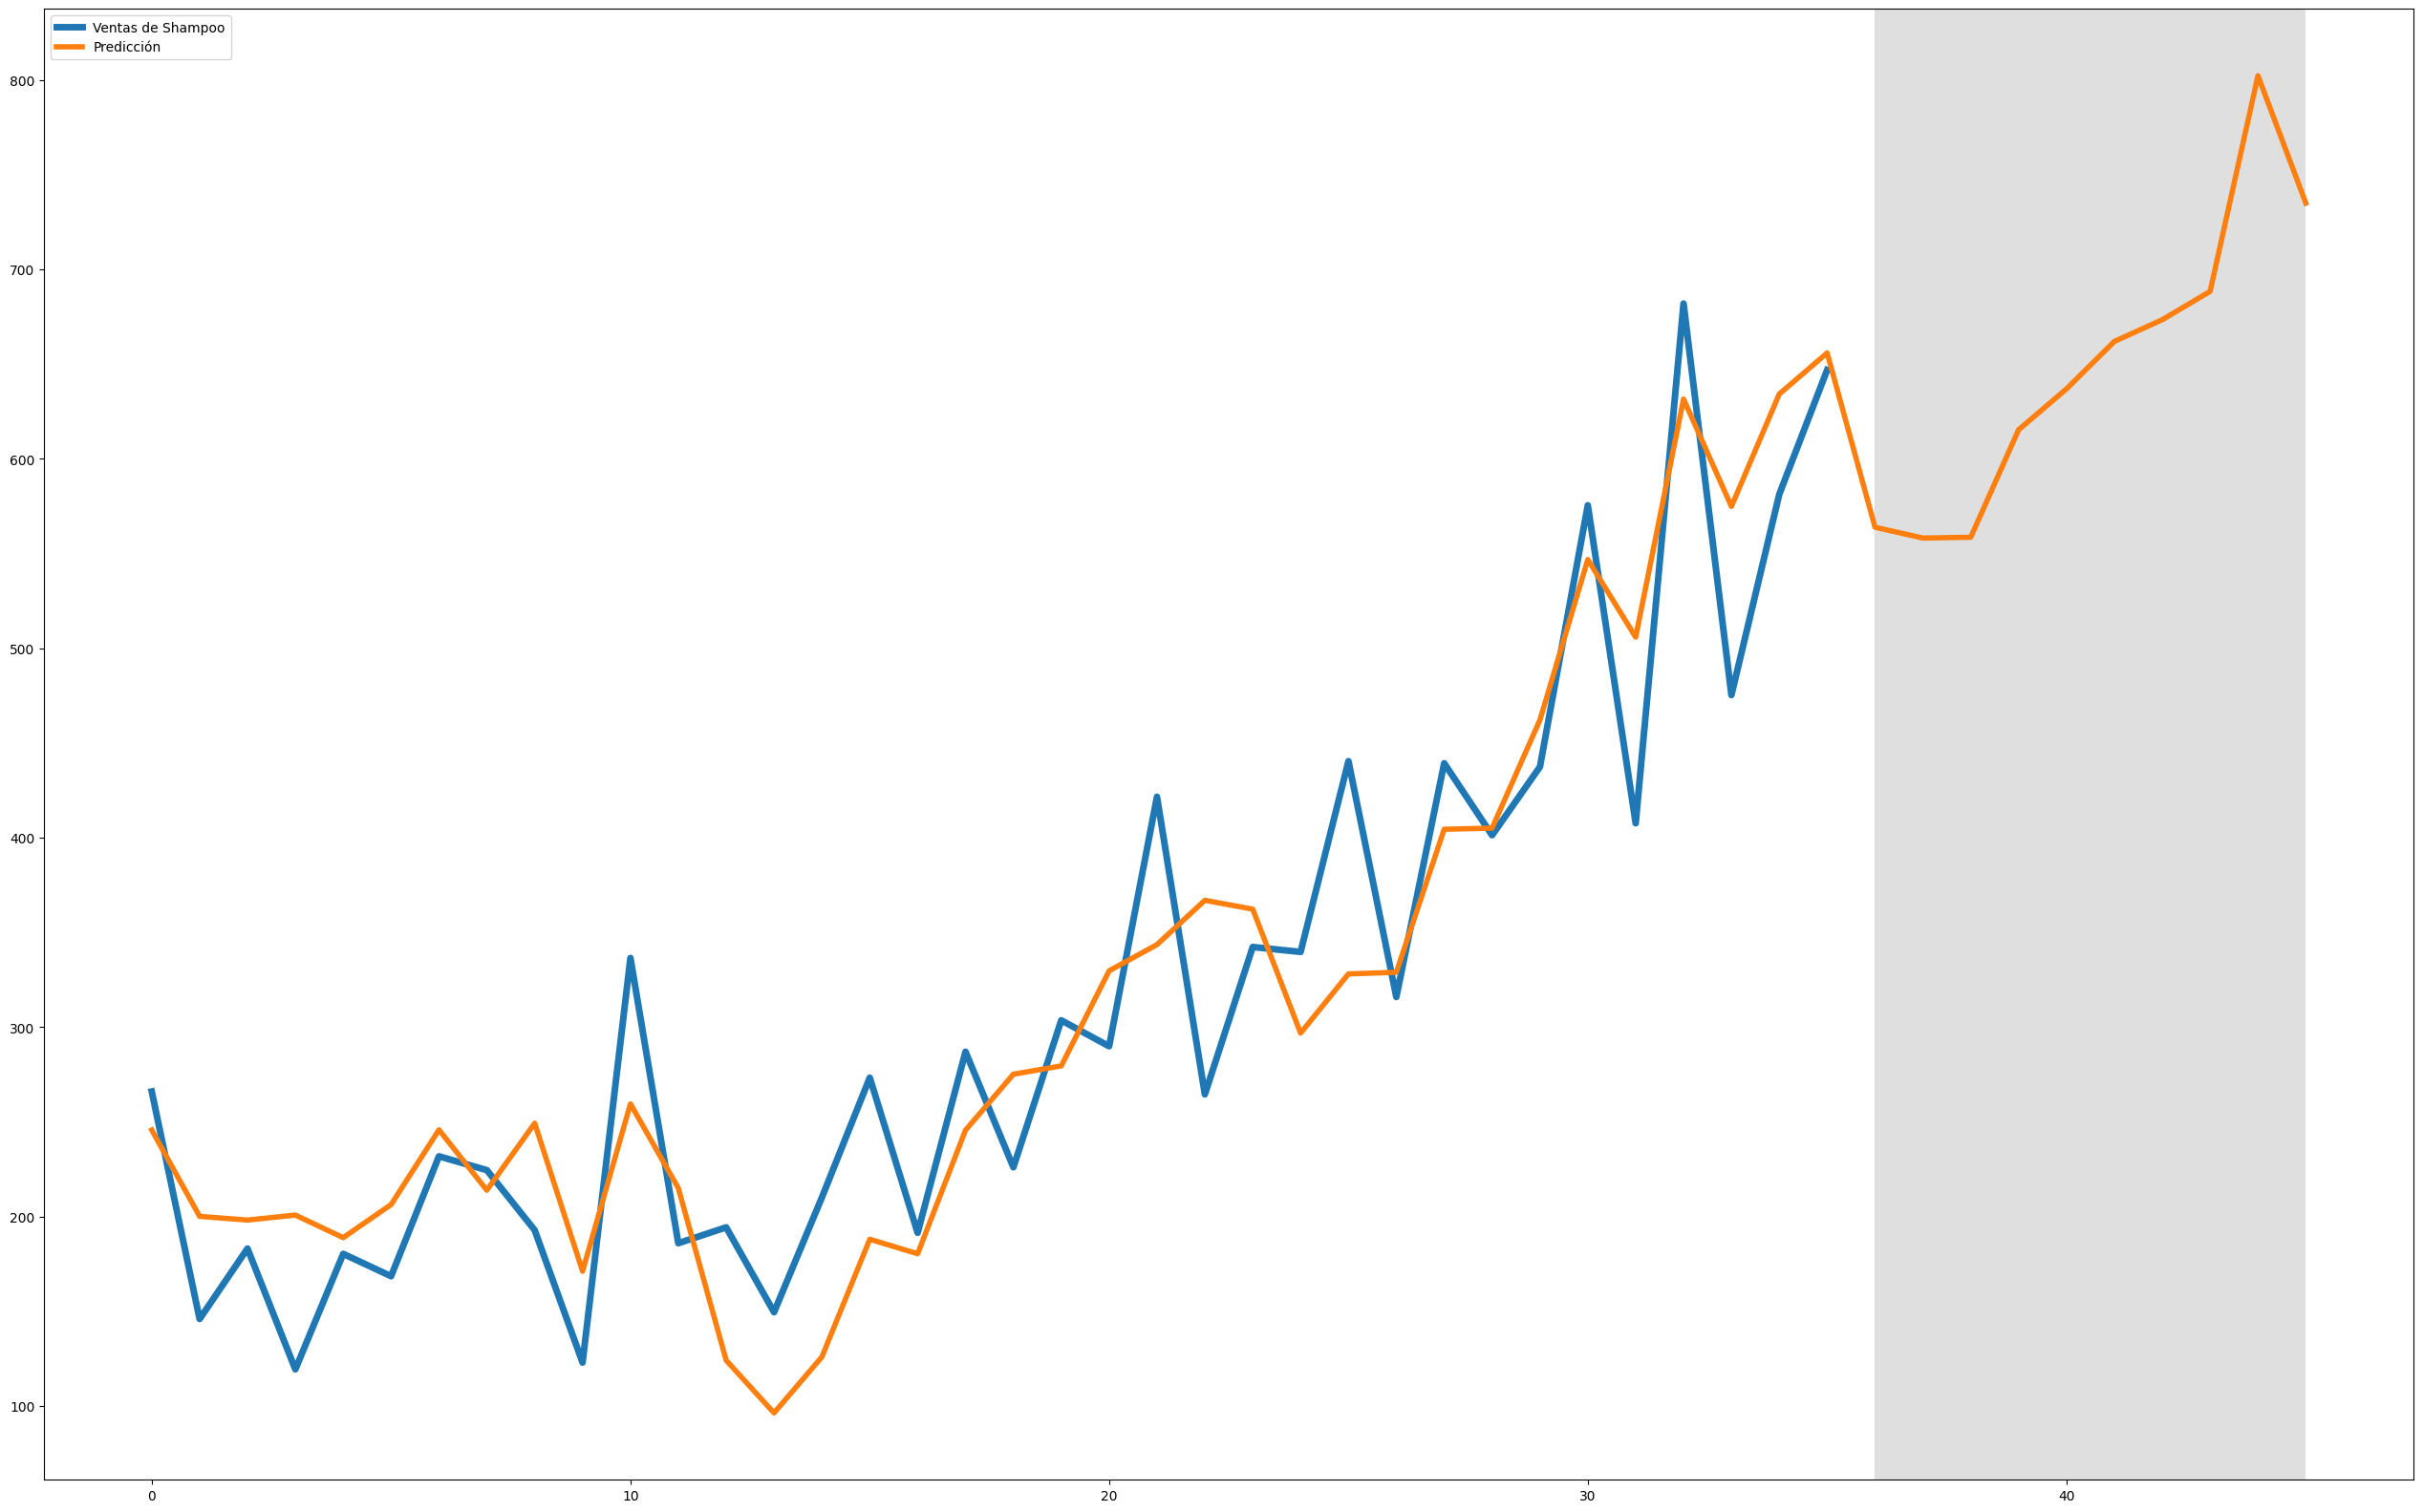

In [9]:
# Ejecución principal
if __name__ == '__main__':

    # Configuración de la figura
    plt.figure(
        figsize=(32, 20)
    )

    # Cargar los datos desde un archivo CSV
    data = pd.read_csv('C:\\Users\\BPCJR\\Documents\\rp\\ejercicios\\shampoo.csv')["Sales"]
    data = data.values.tolist()

    k = 10  # Pasos futuros

    # Predicciones con el modelo de Holt-Winters
    prediccion = suavizado_winters(data, 12, pasos_futuros=10)

    # Graficar los datos reales y las predicciones
    plt.plot(data, linewidth=5, label='Ventas de Shampoo')
    plt.plot(prediccion, linewidth=4, label='Predicción')
    
    # Resaltar la zona de predicción
    plt.axvspan(*(len(data), len(data) + k - 1), 
                facecolor='grey', 
                alpha=0.25)
    
    plt.legend()
    plt.show()
